# 1. Functions

## imports

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

## imOpen

In [2]:
def imOpen(imageFileName):
    originalImage = Image.open(imageFileName)
    width = originalImage.size[0]
    height = originalImage.size[1]
    image = Image.new('L', (width,height))
    for i in range(0, width):
        for j in range(0, height):
            r, g, b = originalImage.getpixel((i, j))
            color = 0.3 * r + 0.59 * g + 0.11 * b
            image.putpixel((i, j), int(color))
    
    return image

## toStrH

In [3]:
def toStrH(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "H "
    code += "{} {}{}".format(width, height, lineBreak)

    for j in range(0, height):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for i in range(0, width):
            color = image.getpixel((i, j))
            if(currentValue != color):
                if(i != 0):
                    code += "{} {} {} ".format(currentValue, startOfValue, i - 1)
                currentValue = color
                startOfValue = i
        code += "{} {} {} ".format(currentValue, startOfValue, width - 1)
        code += lineBreak

    return code

## toStrV

In [4]:
def toStrV(image):
    width = image.size[0]
    height = image.size[1]
    lineBreak = "\n"
    code = "V "
    code += "{} {}{}".format(width, height, lineBreak)

    for i in range(0, width):
        currentValue = -1
        startOfValue = -1
        endOfValue = -1
        for j in range(0, height):
            color = image.getpixel((i, j))
            if(currentValue != color):
                if(j != 0):
                    code += "{} {} {} ".format(currentValue, startOfValue, j - 1)
                currentValue = color
                startOfValue = j
        code += "{} {} {} ".format(currentValue, startOfValue, height - 1)    
        code += lineBreak
            
    return code

## toFile

In [5]:
def toFile(fileName, runLengthCode):
    file = open(fileName, "w")
    file.writelines(runLengthCode)
    file.close()

## toImg

In [6]:
def toImg(fileName):
    file = open(fileName)
    fileText = file.read()
    file.close()
    fileTokens= fileText.split()
    runCodeDir = fileTokens[0]
    width = int(fileTokens[1])
    height = int(fileTokens[2])
    image = Image.new('L', (width,height))
    
    currentColorIndex = 3
    currentStartIndex = 4
    currentEndIndex = 5
    currentColor = int(fileTokens[currentColorIndex])
    currentStart = int(fileTokens[currentStartIndex])
    currentEnd = int(fileTokens[currentEndIndex])
    
    outer = -1
    inner = -1

    if(runCodeDir == "V"):
        outer = width
        inner = height
    
    if(runCodeDir == "H"):
        outer = height
        inner = width
    
    for j in range(0, outer):
            current = 0
            while(current < inner):
                for k in range(currentStart, currentEnd + 1):
                    if(runCodeDir == "V"):
                        image.putpixel((j, k), currentColor)
                    if(runCodeDir == "H"):
                        image.putpixel((k, j), currentColor)
                    current += 1

                currentColorIndex += 3
                currentStartIndex += 3
                currentEndIndex += 3

                if(currentColorIndex < len(fileTokens)):
                    currentColor = int(fileTokens[currentColorIndex])
                    currentStart = int(fileTokens[currentStartIndex])
                    currentEnd = int(fileTokens[currentEndIndex])

    return image      
                

# 2. Test

## Encoding

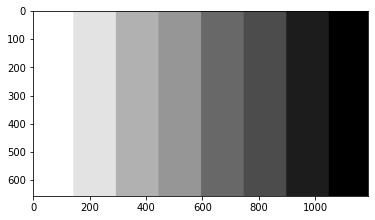

In [7]:
barsImage1 = imOpen("Inputs/Bars.bmp")
plt.imshow(barsImage1, cmap="gray")

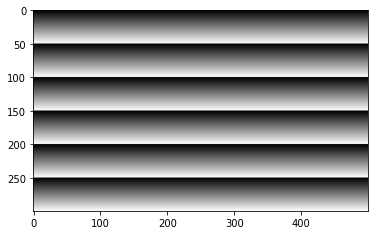

In [8]:
barsImage2 = imOpen("Inputs/Bars2.bmp")
plt.imshow(barsImage2, cmap="gray")

In [9]:
# Encoding first bars image
barsImage1H = toStrH(barsImage1)
barsImage1V = toStrV(barsImage1)
toFile("Outputs/H1.txt", barsImage1H)
toFile("Outputs/V1.txt", barsImage1V)

# Encoding second bars image
barsImage2H = toStrH(barsImage2)
barsImage2V = toStrV(barsImage2)
toFile("Outputs/H2.txt", barsImage2H)
toFile("Outputs/V2.txt", barsImage2V)

## Encoding Disscusion



## Results

In [10]:
imagesDimentions = [barsImage1.size, barsImage2.size]
encodingsCharCounts = [(len(barsImage1H), len(barsImage1V)), (len(barsImage2H), len(barsImage2V))]

for i in range(2):
    dimensions = imagesDimentions[i]
    width = dimensions[0]
    height = dimensions[1]
    size = width * height
    horizontalCharCount = encodingsCharCounts[i][0]
    verticalCharCount = encodingsCharCounts[i][1]
    print()
    print("Bars Image", i + 1)
    print("------------")
    print("Grey scale image size: {} x {} = {}".format(width, height, size))
    print("Horizontal RLE character count: {} (%{} of the original image)".format(horizontalCharCount, round(horizontalCharCount / size * 100, 2)))
    print("Vertical RLE character count: {} (%{} of the original image)".format(verticalCharCount, round(verticalCharCount / size * 100, 2)))



Bars Image 1
------------
Grey scale image size: 1188 x 656 = 779328
Horizontal RLE character count: 238795 (%30.64 of the original image)
Vertical RLE character count: 12498 (%1.6 of the original image)

Bars Image 2
------------
Grey scale image size: 500 x 300 = 150000
Horizontal RLE character count: 3178 (%2.12 of the original image)
Vertical RLE character count: 1624510 (%1083.01 of the original image)


## Comment

Run-length encoding (RLE) is most effective when the data it is encoding contains many sequences in which the same data value occurs in many consecutive data elements.

From that we can see that horizontal RLE shows better compression results with images containing horizontal shapes with consecutive values of the same intensity than vertical RLE (e.g. Bars2.bmp). On the other hand, vertical RLE shows better compression results with images containing vertical shapes with consecutive values of the same intensity than horizontal RLE (e.g. Bars.bmp). 

If we try to analyze the results that came from running horizontal and vertical RLE on Bars and Bars2, we can see the following:

1. Bars: contains multiple vertical bars of the same intensity with moderate variation on the horizontal side. For that, the vertical RLE size was **%1.6** of the original image size, and the horizontal RLE size was **%30.64** of the original image size.

1. Bars2: contains stacks of horizontal lines of the same intensity, while having a lot of variation of intensities vertically. Hence, the horizontal RLE size was **%2.12** of the original image size, and the vertical RLE size was **%1083.01** of the original image size.

**Note:** The calculations that a character takes 1 byte and a grayscale image occupies width*height bytes.

## Decoding

### Mystery

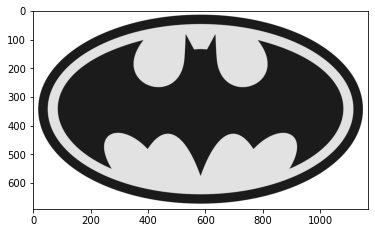

In [11]:
image = toImg("Inputs/Mystery1.txt")
plt.imshow(image, cmap="gray")  

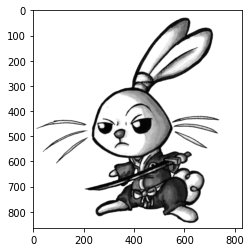

In [12]:
image = toImg("Inputs/Mystery2.txt")
plt.imshow(image, cmap="gray")  

### Bars

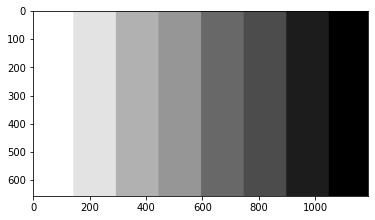

In [13]:
image = toImg("Outputs/H1.txt")
plt.imshow(image, cmap="gray")  

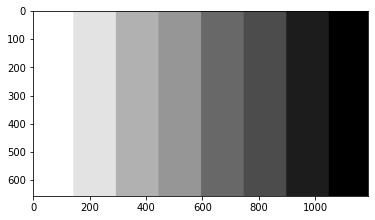

In [14]:
image = toImg("Outputs/V1.txt")
plt.imshow(image, cmap="gray")  

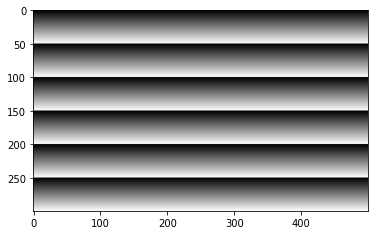

In [15]:
image = toImg("Outputs/H2.txt")
plt.imshow(image, cmap="gray")  

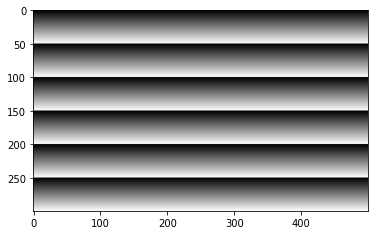

In [16]:
image = toImg("Outputs/V2.txt")
plt.imshow(image, cmap="gray")